In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 512
img_width = 512
directory='Hot_Dogs_Photo'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [4]:
Training=tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    interpolation='gaussian',
    validation_split=0.3,
    subset="training",
    follow_links=False,
    crop_to_aspect_ratio=True,
)

Found 8203 files belonging to 9 classes.
Using 5743 files for training.


In [5]:
Valid=tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    interpolation='gaussian',
    validation_split=0.3,
    subset="validation",
    follow_links=False,
    crop_to_aspect_ratio=True,
)

Found 8203 files belonging to 9 classes.
Using 2460 files for validation.


In [6]:
class_names = Training.class_names
print(class_names)

['.ipynb_checkpoints', 'Beagle', 'Blenheim_spaniel', 'Corgi', 'Dalmatian', 'German_shepherd', 'Huskies', 'Labrador', 'Shar_pei']


In [7]:
for image_batch, labels_batch in Training:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 512, 512, 3)
(32,)


In [8]:
# AUTOTUNE = tf.data.AUTOTUNE

# Training = Training.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# Valid = Valid.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = len(class_names)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

model = Sequential([
  data_augmentation,
  #layers.Resizing(img_height, img_width,interpolation='gaussian'),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 512, 512, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)     

In [12]:
epochs=100
history = model.fit(
  Training,
  validation_data=Valid,
  epochs=epochs
)

180/180 [==============================] - 36s 201ms/step - loss: 0.2204 - accuracy: 0.9251 - val_loss: 0.3815 - val_accuracy: 0.8972
Epoch 69/100
180/180 [==============================] - 35s 193ms/step - loss: 0.2088 - accuracy: 0.9290 - val_loss: 0.2900 - val_accuracy: 0.9110
Epoch 70/100
180/180 [==============================] - 35s 195ms/step - loss: 0.2130 - accuracy: 0.9230 - val_loss: 0.3470 - val_accuracy: 0.9012
Epoch 71/100
180/180 [==============================] - 36s 201ms/step - loss: 0.2290 - accuracy: 0.9208 - val_loss: 0.3222 - val_accuracy: 0.9024
Epoch 72/100
180/180 [==============================] - 37s 202ms/step - loss: 0.2283 - accuracy: 0.9211 - val_loss: 0.3680 - val_accuracy: 0.8805
Epoch 73/100
180/180 [==============================] - 36s 199ms/step - loss: 0.2210 - accuracy: 0.9272 - val_loss: 0.3354 - val_accuracy: 0.8996
Epoch 74/100
180/180 [==============================] - 36s 199ms/step - loss: 0.2166 - accuracy: 0.9262 - val_loss: 0.3090 - val_a

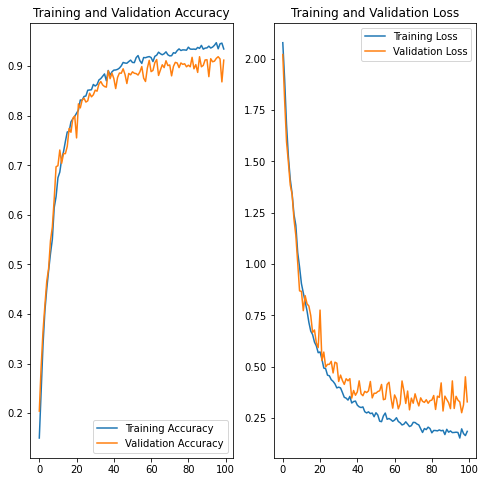

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('512-7.png')
plt.show()
#print('acc = ',acc)
#print('val_acc = ',val_acc)
#print('loss = ',loss)
#print('val_loss = ',val_loss)
#print('epochs_range = ',epochs_range)

In [14]:
#!g1.4
model.save('Model')

INFO:tensorflow:Assets written to: Model/assets


In [24]:
#!g1.4
image=tf.keras.preprocessing.image.load_img('4.jpg',target_size=(512,512))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
img_array=tf.expand_dims(input_arr,0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Shar_pei with a 49.19 percent confidence.


In [ ]:
#!g1.4
